## 4.4　勾配

In [1]:
import sys
import numpy as np

In [2]:
sys.path.append('../input/deeplearningfromscratchmaster/deep-learning-from-scratch-master')

In [3]:
from common.functions import softmax, cross_entropy_error

In [4]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [5]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

`f(x+h)` と `f(x-h)`　を求め、最後に数値微分を計算している。<br>
この工程を `x` のそれぞれの要素に行っていくだけである。

以下の例をもとに、`x.size` に 2 を代入して考えると、分かりやすい。

In [6]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


勾配とは、単に**偏微分をまとめたもの**である。<br>
描画すると以下のようになり、**関数の値を最も減らす方向**を示す。

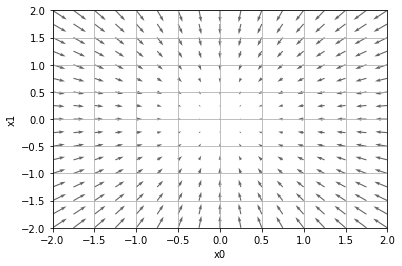

### 4.4.1　勾配法

`descent` は勾配の意。

In [7]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

引数 `x` が勾配と学習率を使って更新されていく。

In [8]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [9]:
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[ 2.34235971e+12 -3.96091057e+12]
[ 2.34235971e+12 -3.96091057e+12]


### 4.4.2　ニューラルネットワークに対する勾配

In [10]:
from common.gradient import numerical_gradient

In [11]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [12]:
net = simpleNet()
print(net.W)

[[ 0.42875037 -1.09670346  0.24866542]
 [-2.38228839  0.47330153 -0.20017261]]


0 層目 `x` と重み `W` から、1 層目 `p` を求める。

In [13]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.88680933 -0.23205069 -0.0309561 ]


In [14]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.6801400453747255

In [15]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.0475098   0.24856257 -0.29607237]
 [ 0.0712647   0.37284386 -0.44410856]]


`net.loss` の中にある `net.predict` には、`net.W` が必要である。<br>
損失関数 `f` とその変数 `W` を`numerical_gradient` に渡せばいい。